# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


renda = pd.read_csv("previsao_de_renda.csv")

In [39]:
renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [40]:
renda['data_ref'] = pd.to_datetime(renda['data_ref'])

bins = [
    '2014-12-31', '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31', '2016-03-31'
]

labels = [
    'primeiro_trimestre_2015', 'segundo_trimestre_2015', 'terceiro_trimestre_2015', 'quarto_trimestre_2015', 'primeiro_trimestre_2016'
]

renda['trimestre'] = pd.cut(renda['data_ref'], bins=pd.to_datetime(bins), labels=labels, right=True)



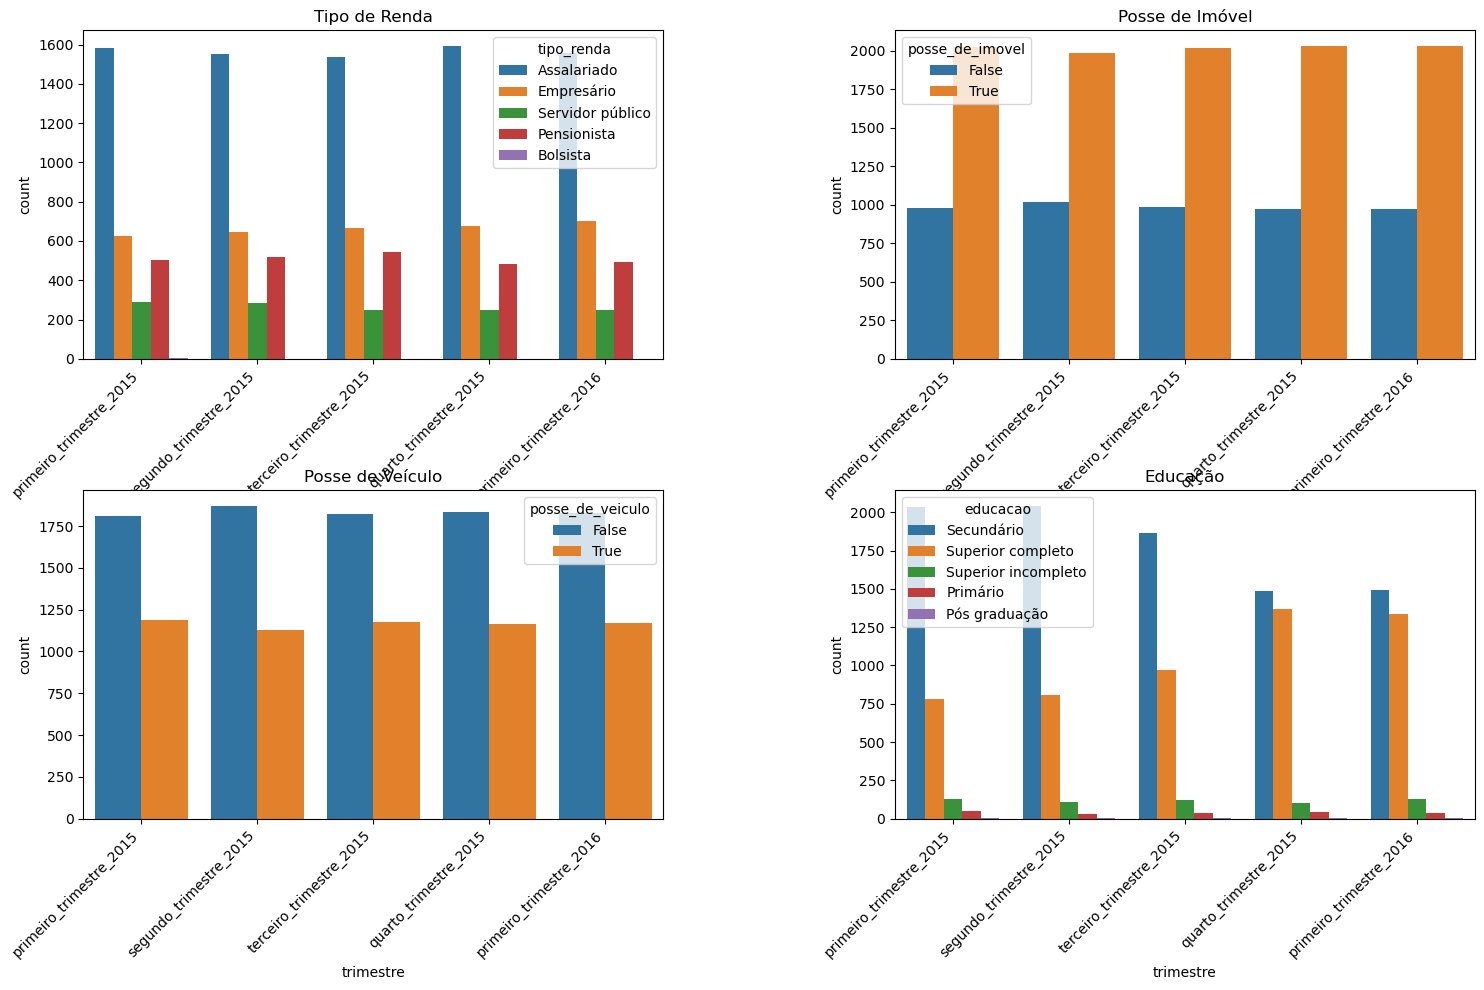

In [41]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Primeiro gráfico
sns.countplot(x='trimestre', hue='tipo_renda', data=renda, ax=axs[0, 0])
axs[0, 0].set_title('Tipo de Renda')
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=45, ha="right")

# Segundo gráfico
sns.countplot(x='trimestre', hue='posse_de_imovel', data=renda, ax=axs[0, 1])
axs[0, 1].set_title('Posse de Imóvel')
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=45, ha="right")

# Terceiro gráfico
sns.countplot(x='trimestre', hue='posse_de_veiculo', data=renda, ax=axs[1, 0])
axs[1, 0].set_title('Posse de Veículo')
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=45, ha="right")

# Quarto gráfico
sns.countplot(x='trimestre', hue='educacao', data=renda, ax=axs[1, 1])
axs[1, 1].set_title('Educação')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.4) 

- Em relação as variáveis qualitativas, elas demonstraram extrema estabilidade.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

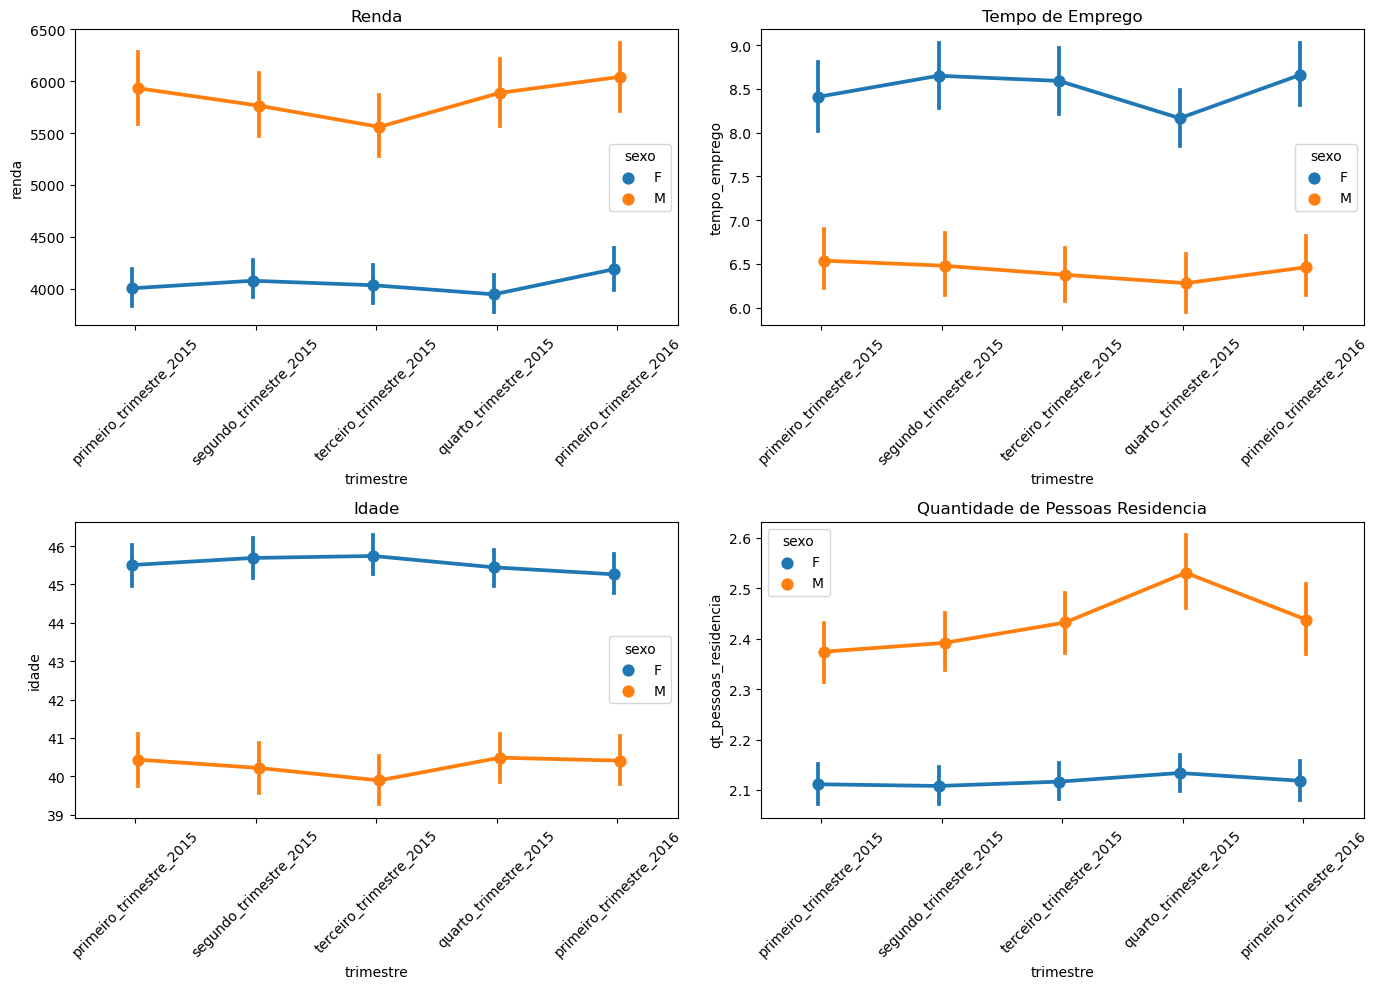

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1: renda
sns.pointplot(x="trimestre", y="renda", hue="sexo",
              data=renda, dodge=True, errorbar=('ci', 95), ax=axs[0, 0])
axs[0, 0].set_title('Renda')
axs[0, 0].tick_params(axis='x', rotation=45)

# Gráfico 2: tempo_emprego
sns.pointplot(x="trimestre", y="tempo_emprego", hue="sexo",
              data=renda, dodge=True, errorbar=('ci', 95), ax=axs[0, 1])
axs[0, 1].set_title('Tempo de Emprego')
axs[0, 1].tick_params(axis='x', rotation=45)

# Gráfico 3: idade
sns.pointplot(x="trimestre", y="idade", hue="sexo",
              data=renda, dodge=True, errorbar=('ci', 95), ax=axs[1, 0])
axs[1, 0].set_title('Idade')
axs[1, 0].tick_params(axis='x', rotation=45)

# Gráfico 4: qtd_filhos
sns.pointplot(x="trimestre", y="qt_pessoas_residencia", hue="sexo",
              data=renda, dodge=True, errorbar=('ci', 95), ax=axs[1, 1])
axs[1, 1].set_title('Quantidade de Pessoas Residencia')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()

- Utilizar as variáveis acima na modelagem pode ser viável, tendo em vista que o ruído delas, com o tempo, se mostrou mínimo. No caso, seria necessário apenas verificar a relevância de cada uma.